In [112]:
!pip install statsmodels

     |████████████████████████████████| 8.7 MB 12.6 MB/s eta 0:00:01
     |████████████████████████████████| 231 kB 80.3 MB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
import datetime
import math
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier



In [6]:
df = pd.read_csv('bike.csv')

In [7]:
print(len(df))

2092573


In [9]:
df

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,527,2019-10-01 00:00:05.6180,2019-10-01 00:08:52.9430,3746,6 Ave & Broome St,40.724308,-74.004730,223,W 13 St & 7 Ave,40.737815,-73.999947,41750,Subscriber,1993,1
1,174,2019-10-01 00:00:15.8750,2019-10-01 00:03:10.1680,3301,Columbus Ave & W 95 St,40.791956,-73.968087,3283,W 89 St & Columbus Ave,40.788221,-73.970416,18264,Subscriber,1992,1
2,759,2019-10-01 00:00:19.8240,2019-10-01 00:12:59.7070,161,LaGuardia Pl & W 3 St,40.729170,-73.998102,174,E 25 St & 1 Ave,40.738177,-73.977387,25525,Subscriber,1995,1
3,615,2019-10-01 00:00:21.0680,2019-10-01 00:10:36.6790,254,W 11 St & 6 Ave,40.735324,-73.998004,477,W 41 St & 8 Ave,40.756405,-73.990026,30186,Subscriber,1992,1
4,761,2019-10-01 00:00:26.3800,2019-10-01 00:13:08.3130,161,LaGuardia Pl & W 3 St,40.729170,-73.998102,174,E 25 St & 1 Ave,40.738177,-73.977387,25597,Subscriber,1992,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2092568,729,2019-10-31 23:59:12.1900,2019-11-01 00:11:21.4860,237,E 11 St & 2 Ave,40.730473,-73.986724,311,Norfolk St & Broome St,40.717227,-73.988021,25725,Subscriber,1995,1
2092569,645,2019-10-31 23:59:17.0470,2019-11-01 00:10:02.9450,3259,9 Ave & W 28 St,40.749370,-73.999234,461,E 20 St & 2 Ave,40.735877,-73.982050,39583,Customer,1969,0
2092570,257,2019-10-31 23:59:22.5140,2019-11-01 00:03:40.2600,3798,W 40 St & 5 Ave,40.752269,-73.982079,505,6 Ave & W 33 St,40.749013,-73.988484,21240,Subscriber,1985,1
2092571,466,2019-10-31 23:59:23.1710,2019-11-01 00:07:09.2050,328,Watts St & Greenwich St,40.724055,-74.009660,361,Allen St & Hester St,40.716059,-73.991908,34916,Subscriber,1989,0


In [10]:
ndf = df[['tripduration', 'starttime', 'stoptime',
       'start station name', 'end station name',
      'bikeid', 'usertype','birth year', 'gender']]

In [11]:
df = ndf.rename(columns={"tripduration" : "Trip_Duration", "starttime" : "Start_Time", "stoptime" : "Stop_Time", "start station name": "Start_Station_Name","end station name": "End_Station_Name", "bikeid":"Bike_Id", "usertype":"User_Type", "birth year":"Birth_Year", "gender":"Gender"})

In [12]:
df.dropna()

,Trip_Duration,Start_Time,Stop_Time,Start_Station_Name,End_Station_Name,Bike_Id,User_Type,Birth_Year,Gender
0,527,2019-10-01 00:00:05.6180,2019-10-01 00:08:52.9430,6 Ave & Broome St,W 13 St & 7 Ave,41750,Subscriber,1993,1
1,174,2019-10-01 00:00:15.8750,2019-10-01 00:03:10.1680,Columbus Ave & W 95 St,W 89 St & Columbus Ave,18264,Subscriber,1992,1
2,759,2019-10-01 00:00:19.8240,2019-10-01 00:12:59.7070,LaGuardia Pl & W 3 St,E 25 St & 1 Ave,25525,Subscriber,1995,1
3,615,2019-10-01 00:00:21.0680,2019-10-01 00:10:36.6790,W 11 St & 6 Ave,W 41 St & 8 Ave,30186,Subscriber,1992,1
4,761,2019-10-01 00:00:26.3800,2019-10-01 00:13:08.3130,LaGuardia Pl & W 3 St,E 25 St & 1 Ave,25597,Subscriber,1992,1
...,...,...,...,...,...,...,...,...,...
2092568,729,2019-10-31 23:59:12.1900,2019-11-01 00:11:21.4860,E 11 St & 2 Ave,Norfolk St & Broome St,25725,Subscriber,1995,1
2092569,645,2019-10-31 23:59:17.0470,2019-11-01 00:10:02.9450,9 Ave & W 28 St,E 20 St & 2 Ave,39583,Customer,1969,0
2092570,257,2019-10-31 23:59:22.5140,2019-11-01 00:03:40.2600,W 40 St & 5 Ave,6 Ave & W 33 St,21240,Subscriber,1985,1
2092571,466,2019-10-31 23:59:23.1710,2019-11-01 00:07:09.2050,Watts St & Greenwich St,Allen St & Hester St,34916,Subscriber,1989,0


In [13]:
df

,Trip_Duration,Start_Time,Stop_Time,Start_Station_Name,End_Station_Name,Bike_Id,User_Type,Birth_Year,Gender
0,527,2019-10-01 00:00:05.6180,2019-10-01 00:08:52.9430,6 Ave & Broome St,W 13 St & 7 Ave,41750,Subscriber,1993,1
1,174,2019-10-01 00:00:15.8750,2019-10-01 00:03:10.1680,Columbus Ave & W 95 St,W 89 St & Columbus Ave,18264,Subscriber,1992,1
2,759,2019-10-01 00:00:19.8240,2019-10-01 00:12:59.7070,LaGuardia Pl & W 3 St,E 25 St & 1 Ave,25525,Subscriber,1995,1
3,615,2019-10-01 00:00:21.0680,2019-10-01 00:10:36.6790,W 11 St & 6 Ave,W 41 St & 8 Ave,30186,Subscriber,1992,1
4,761,2019-10-01 00:00:26.3800,2019-10-01 00:13:08.3130,LaGuardia Pl & W 3 St,E 25 St & 1 Ave,25597,Subscriber,1992,1
...,...,...,...,...,...,...,...,...,...
2092568,729,2019-10-31 23:59:12.1900,2019-11-01 00:11:21.4860,E 11 St & 2 Ave,Norfolk St & Broome St,25725,Subscriber,1995,1
2092569,645,2019-10-31 23:59:17.0470,2019-11-01 00:10:02.9450,9 Ave & W 28 St,E 20 St & 2 Ave,39583,Customer,1969,0
2092570,257,2019-10-31 23:59:22.5140,2019-11-01 00:03:40.2600,W 40 St & 5 Ave,6 Ave & W 33 St,21240,Subscriber,1985,1
2092571,466,2019-10-31 23:59:23.1710,2019-11-01 00:07:09.2050,Watts St & Greenwich St,Allen St & Hester St,34916,Subscriber,1989,0


In [14]:
df["Trip_Duration_mins"] = round(df["Trip_Duration"]/60, ndigits = 0)

In [15]:
df

,Trip_Duration,Start_Time,Stop_Time,Start_Station_Name,End_Station_Name,Bike_Id,User_Type,Birth_Year,Gender,Trip_Duration_mins
0,527,2019-10-01 00:00:05.6180,2019-10-01 00:08:52.9430,6 Ave & Broome St,W 13 St & 7 Ave,41750,Subscriber,1993,1,9.0
1,174,2019-10-01 00:00:15.8750,2019-10-01 00:03:10.1680,Columbus Ave & W 95 St,W 89 St & Columbus Ave,18264,Subscriber,1992,1,3.0
2,759,2019-10-01 00:00:19.8240,2019-10-01 00:12:59.7070,LaGuardia Pl & W 3 St,E 25 St & 1 Ave,25525,Subscriber,1995,1,13.0
3,615,2019-10-01 00:00:21.0680,2019-10-01 00:10:36.6790,W 11 St & 6 Ave,W 41 St & 8 Ave,30186,Subscriber,1992,1,10.0
4,761,2019-10-01 00:00:26.3800,2019-10-01 00:13:08.3130,LaGuardia Pl & W 3 St,E 25 St & 1 Ave,25597,Subscriber,1992,1,13.0
...,...,...,...,...,...,...,...,...,...,...
2092568,729,2019-10-31 23:59:12.1900,2019-11-01 00:11:21.4860,E 11 St & 2 Ave,Norfolk St & Broome St,25725,Subscriber,1995,1,12.0
2092569,645,2019-10-31 23:59:17.0470,2019-11-01 00:10:02.9450,9 Ave & W 28 St,E 20 St & 2 Ave,39583,Customer,1969,0,11.0
2092570,257,2019-10-31 23:59:22.5140,2019-11-01 00:03:40.2600,W 40 St & 5 Ave,6 Ave & W 33 St,21240,Subscriber,1985,1,4.0
2092571,466,2019-10-31 23:59:23.1710,2019-11-01 00:07:09.2050,Watts St & Greenwich St,Allen St & Hester St,34916,Subscriber,1989,0,8.0


In [16]:
df = df.rename(columns={"Trip_Duration_mins":"Trip_Duration_Mins"})

In [17]:
df['Trip_Duration_Mins'] = df['Trip_Duration_Mins'].round().astype('int32')

In [18]:
df.loc[:,('Birth_Year')] = df['Birth_Year'].astype(int)

In [19]:
df

,Trip_Duration,Start_Time,Stop_Time,Start_Station_Name,End_Station_Name,Bike_Id,User_Type,Birth_Year,Gender,Trip_Duration_Mins
0,527,2019-10-01 00:00:05.6180,2019-10-01 00:08:52.9430,6 Ave & Broome St,W 13 St & 7 Ave,41750,Subscriber,1993,1,9
1,174,2019-10-01 00:00:15.8750,2019-10-01 00:03:10.1680,Columbus Ave & W 95 St,W 89 St & Columbus Ave,18264,Subscriber,1992,1,3
2,759,2019-10-01 00:00:19.8240,2019-10-01 00:12:59.7070,LaGuardia Pl & W 3 St,E 25 St & 1 Ave,25525,Subscriber,1995,1,13
3,615,2019-10-01 00:00:21.0680,2019-10-01 00:10:36.6790,W 11 St & 6 Ave,W 41 St & 8 Ave,30186,Subscriber,1992,1,10
4,761,2019-10-01 00:00:26.3800,2019-10-01 00:13:08.3130,LaGuardia Pl & W 3 St,E 25 St & 1 Ave,25597,Subscriber,1992,1,13
...,...,...,...,...,...,...,...,...,...,...
2092568,729,2019-10-31 23:59:12.1900,2019-11-01 00:11:21.4860,E 11 St & 2 Ave,Norfolk St & Broome St,25725,Subscriber,1995,1,12
2092569,645,2019-10-31 23:59:17.0470,2019-11-01 00:10:02.9450,9 Ave & W 28 St,E 20 St & 2 Ave,39583,Customer,1969,0,11
2092570,257,2019-10-31 23:59:22.5140,2019-11-01 00:03:40.2600,W 40 St & 5 Ave,6 Ave & W 33 St,21240,Subscriber,1985,1,4
2092571,466,2019-10-31 23:59:23.1710,2019-11-01 00:07:09.2050,Watts St & Greenwich St,Allen St & Hester St,34916,Subscriber,1989,0,8


In [20]:
df.describe()

,Trip_Duration,Bike_Id,Birth_Year,Gender,Trip_Duration_Mins
count,2.092573e+06,2.092573e+06,2.092573e+06,2.092573e+06,2.092573e+06
mean,9.145827e+02,3.168730e+04,1.980680e+03,1.171635e+00,1.524263e+01
std,7.479508e+03,8.305669e+03,1.219031e+01,5.376945e-01,1.246589e+02
min,6.100000e+01,1.452900e+04,1.874000e+03,0.000000e+00,1.000000e+00
25%,3.700000e+02,2.641900e+04,1.970000e+03,1.000000e+00,6.000000e+00
50%,6.170000e+02,3.278400e+04,1.983000e+03,1.000000e+00,1.000000e+01
75%,1.054000e+03,3.952500e+04,1.991000e+03,1.000000e+00,1.800000e+01
max,2.946638e+06,4.206800e+04,2.003000e+03,2.000000e+00,4.911100e+04


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2092573 entries, 0 to 2092572
Data columns (total 10 columns):
Trip_Duration         int64
Start_Time            object
Stop_Time             object
Start_Station_Name    object
End_Station_Name      object
Bike_Id               int64
User_Type             object
Birth_Year            int64
Gender                int64
Trip_Duration_Mins    int32
dtypes: int32(1), int64(4), object(5)
memory usage: 151.7+ MB


## Selecting and encoding the variables


- Onehot Encoding Gender, since it's a categorical variable .get_dummies()
- OneHot Encoding User Type, same as above
- BikeID may not be useful
- Start and End station names will likely be useful but are best inspected from a network point of view


In [24]:
df['Gender'].value_counts()

1    1425934
2     512899
0     153740
Name: Gender, dtype: int64

In [23]:
seleted_df = df[['Trip_Duration', 'Birth_Year', 'Gender', 'Trip_Duration_Mins', 'User_Type']]

In [25]:
gender_map = {1: 'Male', 2: 'Female', 0: 'Unknown'} ## Please change this as needed
pd.get_dummies(df['Gender']).rename(columns = gender_map)

,Unknown,Male,Female
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
2092568,0,1,0
2092569,1,0,0
2092570,0,1,0
2092571,1,0,0


In [101]:
customer_map = {0: 'Customer', 1: 'Subscriber'} ## Please change this as needed
pd.get_dummies(df['User_Type']).rename(columns = gender_map)

,Customer,Subscriber
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
2092568,0,1
2092569,1,0
2092570,0,1
2092571,0,1


### Replace Gender and Subscriber Column with OneHot Encoding. 

In [102]:
seleted_df = pd.concat([seleted_df.drop(['Gender'], axis = 1), pd.get_dummies(df['Gender']).rename(columns = gender_map)], axis = 1)
seleted_df = pd.concat([seleted_df.drop(['User_Type'], axis = 1), pd.get_dummies(df['User_Type']).rename(columns = customer_map)], axis = 1)



## Simple Correlations

In [103]:
seleted_df.corr()

,Trip_Duration,Birth_Year,Trip_Duration_Mins,Unknown,Male,Female,Customer,Subscriber
Trip_Duration,1.000000,-0.006633,0.999997,0.034274,-0.021027,0.001987,0.046817,-0.046817
Birth_Year,-0.006633,1.000000,-0.006636,-0.232732,0.063234,0.072670,-0.024576,0.024576
Trip_Duration_Mins,0.999997,-0.006636,1.000000,0.034276,-0.021029,0.001989,0.046817,-0.046817
Unknown,0.034274,-0.232732,0.034276,1.000000,-0.411839,-0.160456,0.522406,-0.522406
Male,-0.021027,0.063234,-0.021029,-0.411839,1.000000,-0.833367,-0.257518,0.257518
Female,0.001987,0.072670,0.001989,-0.160456,-0.833367,1.000000,-0.037929,0.037929
Customer,0.046817,-0.024576,0.046817,0.522406,-0.257518,-0.037929,1.000000,-1.000000
Subscriber,-0.046817,0.024576,-0.046817,-0.522406,0.257518,0.037929,-1.000000,1.000000


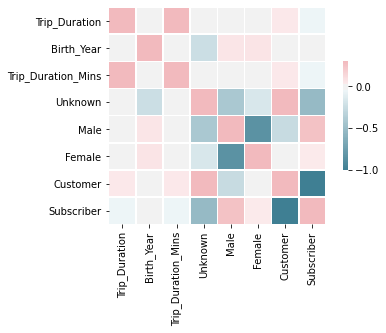

In [104]:
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(seleted_df.corr(), cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Check Correlations.

- Subscriber and being Male seem to be correlated.  
- Stronger relationship between Male/Female/Unknown. This is expcted since being one gender requires not being the other two.
- Trip Durations and Trip duration minutes are correlated.
- From the features that correlate, we have to pick just one

In [105]:
seleted_df = seleted_df[['Trip_Duration_Mins', 'Birth_Year', 'Male', 'Subscriber']]
seleted_df

,Trip_Duration_Mins,Birth_Year,Male,Subscriber
0,9,1993,1,1
1,3,1992,1,1
2,13,1995,1,1
3,10,1992,1,1
4,13,1992,1,1
...,...,...,...,...
2092568,12,1995,1,1
2092569,11,1969,0,0
2092570,4,1985,1,1
2092571,8,1989,0,1


In [115]:
seleted_df.corr()

,Trip_Duration_Mins,Birth_Year,Male,Subscriber
Trip_Duration_Mins,1.000000,-0.006636,-0.021029,-0.046817
Birth_Year,-0.006636,1.000000,0.063234,0.024576
Male,-0.021029,0.063234,1.000000,0.257518
Subscriber,-0.046817,0.024576,0.257518,1.000000


## Last sanity check is the counts of Subscriber vs Customer. If in classification task if 90% are subscribers then the model can simply predict everyone to be subscribers and get a 90% accuracy. In this case 85% are subscribers.

(array([ 295753.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0., 1796820.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

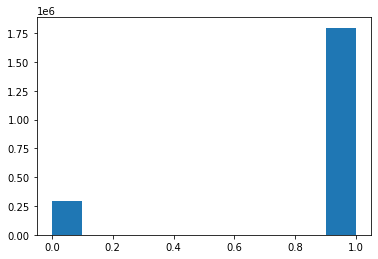

In [130]:
plt.hist(seleted_df['Subscriber'])

In [132]:
seleted_df['Subscriber'].value_counts()[1]/(seleted_df['Subscriber'].value_counts()[0] + seleted_df['Subscriber'].value_counts()[1])

0.8586653846723626

## This is a much simpler dataset now with exactly what we need. 
## First thing we'll do here is look at P-Value. 
## P Value is the probability that there is no relationship between the variables in X (features) and Y (what we're trying to predict).

In [114]:
X = seleted_df[['Trip_Duration_Mins', 'Birth_Year', 'Male',]]
y = seleted_df['Subscriber']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:             Subscriber   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                 5.097e+04
Date:                Wed, 15 Jul 2020   Prob (F-statistic):               0.00
Time:                        22:33:48   Log-Likelihood:            -6.8882e+05
No. Observations:             2092573   AIC:                         1.378e+06
Df Residuals:                 2092569   BIC:                         1.378e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2712      0

### The P > t column here is the p_value for that feature. 
### It translates to: What is the probablity that the feature has no relationship with Y
### The industry/scientific standard is for the value to be less than 0.05 - or - less than 5% chance of the feature having no relationshp with Y. This is ML speak is called being 'statistically significant'
### The Coef gives the strength of the relationship. The higher the coef the higher the relationship btw the feature and Y. Negative values translates to inverse relationship
### In this case all features are significant / they have a relationship with Y
### Unfortunately, the coefficiants are very small so they likey aren't enough to predict anything as we can see in the R-Squared of just 6%


# Prediction with Logistic Regresion

In [137]:
clf = LogisticRegression(random_state=0).fit(X, y)

In [138]:
clf.score(X, y)

0.8621347976868668

### We get an accuracy of 86% with is just 1% greater than a random guess based on the distributiion.

# Prediction with Balanced Logistic Regresion

In [139]:
clf = LogisticRegression(class_weight = 'balanced').fit(X, y)

In [140]:
clf.score(X, y)

0.6818275873768801

### Predicton power drops as expected. 
### However, this is the 'real' predictive power of the model since each example of a subscriber has a lower weight and each example of a customer has a higher weight so they blance out the imbalance.
### Now to see if it can predict on unseen data

# Prediction with Balanced Logistic Regression: Train Test Split

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, stratify = y)

In [161]:
clf = LogisticRegression(class_weight = 'balanced').fit(X_train, y_train)

In [162]:
clf.score(X_test, y_test)

0.6819441683360604

# Prediction with Decision Tree: Train Test Split

In [164]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9062743718746655

In [165]:
clf = DecisionTreeClassifier(class_weight = 'balanced')
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8087142354686282

## Decision Tree does much better in classfying with Unbalanced class

# Bonus: The Gender variable is Imbalanced as well so a 99% accuracy is less impressive.
## Having said that decision trees can be quite powerful in many scenarios

In [158]:
(df['Gender'].value_counts()[1] + df['Gender'].value_counts()[0])/\
(df['Gender'].value_counts()[2] + df['Gender'].value_counts()[1] +  df['Gender'].value_counts()[0])

0.7548955281368918